In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

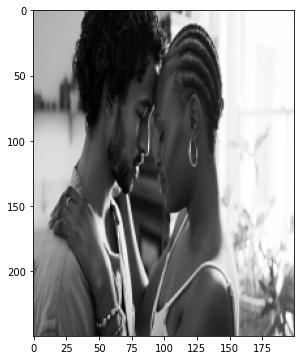

In [31]:
img = cv2.imread('/content/istockphoto-1366635412-170667a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (200,250), interpolation = cv2.INTER_AREA)
plt.figure(figsize=(6,6))
plt.imshow(img, cmap = 'gray')

In [32]:
# Calculate the initial threshold using the mean intensities of corner and non-corner pixels.
def first_time(image):
  height, width = image.shape
  sum = 0
  obs = int(image[0,0]) + int(image[0 , image.shape[1]-1]) + int(image[image.shape[0]-1 , 0]) +int(image[image.shape[0]-1 , image.shape[1]-1])
  mean_background = obs/4

  for i in range(0, height ):
      for j in range(0, width ):
          pixel = image[i, j] 
          sum = sum + pixel
  mean_obj = (sum - obs)/((height*width) - 4) 
  t = (mean_obj - mean_background) / 2
  return t

In [39]:
# Calculate a new threshold value based on the means of pixel intensities in segmented regions.
def second_t(t):
  height, width = img.shape
  sum1 = 0
  sum2 = 0
  count1 = 0
  count2 = 0
  for i in range(0, height ):
      for j in range(0, width ):
          pixel = img[i, j]
          if pixel > t: 
             count1+=1 
             sum1 = sum1 + pixel
          else :
            count2+=1
            sum2 = sum2 + pixel
  mean1 = sum1/count1
  if count2 == 0:
   count2 = 1  
  mean2 = sum2/count2
  t = (mean1 +mean2)/2
  return t           

In [40]:
# Perform an iterative process to refine the threshold value for segmentation.
def iterative(img):
   height, width = img.shape
   first_t = first_time(img)
   sec_t = second_t(first_t)
   while first_t != sec_t:
     first_t =  sec_t 
     sec_t = second_t(first_t)
   return sec_t

In [41]:
iterative(img)

131.48077132416827

In [42]:
def the_iterative_methode(image):
  copy_img = image.copy()
  height, width = copy_img.shape
  intensity_array = []
  t = iterative(copy_img)
  for i in range(0, height ):
      for j in range(0, width ):
          pixel = copy_img[i, j]
          if pixel >= t : 
             x = 0
          else :
            x = pixel
          intensity_array.append(x)   
  array = np.array(intensity_array, dtype=np.uint8).reshape((height,width))
  plt.figure(figsize=(6,6))
  return plt.imshow(array ,cmap = 'gray')

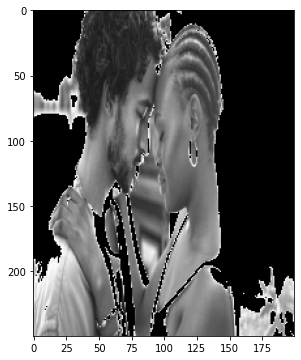

In [43]:
the_iterative_methode(img)